# Libraries use

In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

# Import dataset

In [2]:
NASDAQ = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/NASDAQ.CSV')
NIFTY_50 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/NIFTY 50.CSV')
Nikkei_225 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/Nikkei.CSV')
Hang_Seng = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/Hang Seng.CSV')
es_train = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/ESCORTS_TRAIN.CSV')


# Preprocessing

In [3]:
NASDAQ.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [4]:
print('NASDAQ',NASDAQ.isna().sum(),"NIFTY", NIFTY_50.isna().sum(),"\n\n\n","Nikkei_225",Nikkei_225.isna().sum(),"\n\n\n","Hang_Seng",Hang_Seng.isna().sum())

NASDAQ Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 NIFTY Date        0
Open        5
High        5
Low         5
Close       5
AdjClose    5
Volume      5
dtype: int64 


 Nikkei_225 Date         0
Open        20
High        20
Low         20
Close       20
AdjClose    20
Volume      20
dtype: int64 


 Hang_Seng Date        0
Open        3
High        3
Low         3
Close       3
AdjClose    3
Volume      3
dtype: int64


In [5]:
Hang_Seng[Hang_Seng['Open'].isnull()]

,Date,Open,High,Low,Close,AdjClose,Volume
304,08-02-2016,NaN,NaN,NaN,NaN,NaN,NaN
360,10/21/2016,NaN,NaN,NaN,NaN,NaN,NaN
567,08/23/2017,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Nikkei_225[Nikkei_225['Open'].isnull()]

,Date,Open,High,Low,Close,AdjClose,Volume
538,07/17/2017,NaN,NaN,NaN,NaN,NaN,NaN
557,08-11-2017,NaN,NaN,NaN,NaN,NaN,NaN
583,09/18/2017,NaN,NaN,NaN,NaN,NaN,NaN
598,10-09-2017,NaN,NaN,NaN,NaN,NaN,NaN
631,11/23/2017,NaN,NaN,NaN,NaN,NaN,NaN
658,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN
659,01-02-2018,NaN,NaN,NaN,NaN,NaN,NaN
660,01-03-2018,NaN,NaN,NaN,NaN,NaN,NaN
663,01-08-2018,NaN,NaN,NaN,NaN,NaN,NaN
688,02-12-2018,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
NIFTY_50[NIFTY_50['Open'].isna()]

,Date,Open,High,Low,Close,AdjClose,Volume
161,01-01-2016,NaN,NaN,NaN,NaN,NaN,NaN
313,08-12-2016,NaN,NaN,NaN,NaN,NaN,NaN
655,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN
901,01-01-2019,NaN,NaN,NaN,NaN,NaN,NaN
1099,10/27/2019,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Hang_Seng.dropna(axis=0,inplace=True)
Nikkei_225.dropna(axis=0,inplace=True)
NIFTY_50.dropna(axis=0,inplace=True)

In [9]:
print(Hang_Seng.isnull().sum(),NIFTY_50.isnull().sum(),Nikkei_225.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64


In [10]:
es_train['Stock Open price'][es_train['Date'] == '10/25/2019'] = es_train['Stock Open price'][es_train['Date'] == '10/27/2019']
es_train['NIFTY Open'].fillna(es_train['NIFTY Open'].mean(),inplace=True)
es_train.dropna(axis=0,inplace=True)

# Analysis of data and find out important factors

Text(0.5, 1.0, 'Closing price')

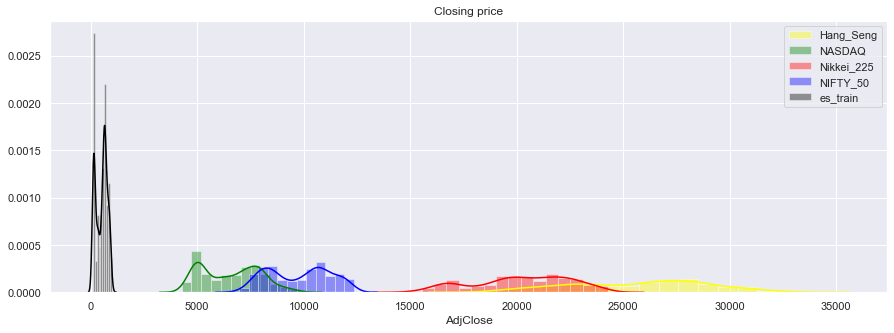

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.AdjClose,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.AdjClose,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.AdjClose,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.AdjClose,color='blue',label='NIFTY_50')
sns.distplot(es_train.AdjClose,color='black',label='es_train')
plt.legend(loc='upper right')
plt.title('Closing price')

Text(0.5, 1.0, 'Open price')

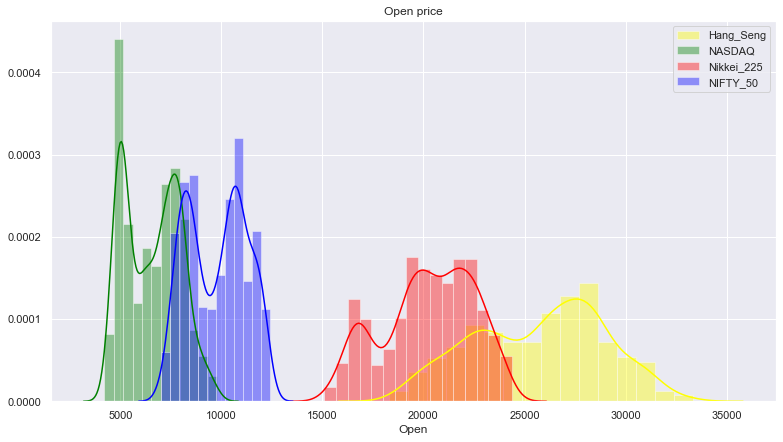

In [12]:
sns.set(rc={'figure.figsize':(13,7)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.Open,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.Open,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.Open,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.Open,color='blue',label='NIFTY_50')
plt.legend(loc='upper right')
plt.title('Open price')

Text(0.5, 1.0, 'Regression plot')

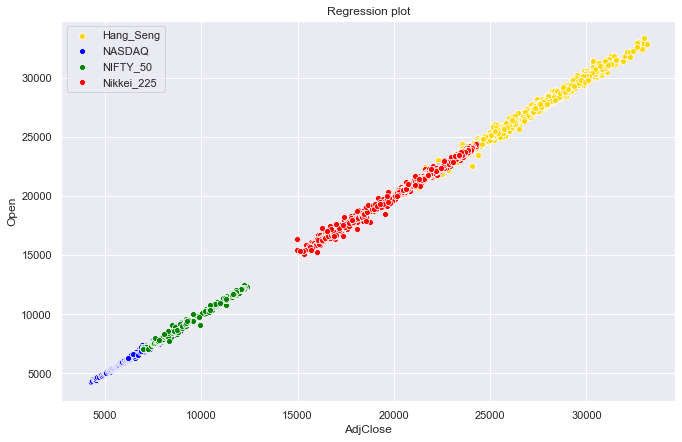

In [13]:
sns.set(rc={'figure.figsize':(11,7)})
sns.scatterplot(Hang_Seng.AdjClose,Hang_Seng.Open,color='gold',label='Hang_Seng')
sns.scatterplot(NASDAQ.AdjClose,NASDAQ.Open,color='blue',label='NASDAQ')
sns.scatterplot(NIFTY_50.AdjClose,NIFTY_50.Open,color='green',label='NIFTY_50')
sns.scatterplot(Nikkei_225.AdjClose,Nikkei_225.Open,color='red',label='Nikkei_225')
plt.legend(loc='upper left')
plt.title('Regression plot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


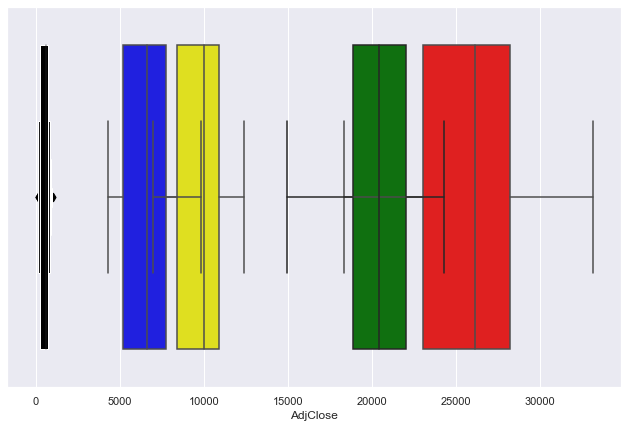

In [14]:
#checking outliers

sns.boxplot(Hang_Seng.AdjClose,color='red')
sns.boxplot(Nikkei_225.AdjClose,color='green')
sns.boxplot(NASDAQ.AdjClose,color='blue')
sns.boxplot(NIFTY_50.AdjClose,color='yellow')
sns.boxenplot(es_train.AdjClose,color='black')

## as we can see in box plot their is no any outliers present in all dataset

In [15]:
# rename of columns
Hang_Seng=Hang_Seng.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
Hang_Seng=Hang_Seng.rename(columns={'Open': 'Hang_Seng_Open'})
NASDAQ=NASDAQ.rename(columns={'AdjClose': 'NASDAQ_AdjClose'})
NASDAQ=NASDAQ.rename(columns={'Open': 'NASDAQ_Open'})
Nikkei_225=Nikkei_225.rename(columns={'AdjClose': 'Nikkei_225_AdjClose'})
Nikkei_225=Nikkei_225.rename(columns={'Open': 'Nikkei_225_Open'})
NIFTY_50=NIFTY_50.rename(columns={'AdjClose': 'NIFTY_50_AdjClose'})
NIFTY_50=NIFTY_50.rename(columns={'Open': 'NIFTY_50_Open'})

In [16]:
# splitting data
df1 = Hang_Seng[['Date','Hang_Seng_AdjClose','Hang_Seng_Open']]
df2 = NASDAQ[['Date','NASDAQ_AdjClose','NASDAQ_Open']]
df3 = Nikkei_225[['Date','Nikkei_225_AdjClose','Nikkei_225_Open']]
df4 = NIFTY_50[['Date','NIFTY_50_AdjClose','NIFTY_50_Open']]

# Merging data

In [17]:
es_train_X = es_train.drop(['Stock Open price'],axis=1)
es_train_Y = es_train.drop(['AdjClose','Volume','NIFTY Open'],axis=1)

In [18]:
tb1 = pd.merge(df1,df2,how='inner',on='Date')
tb1 = pd.merge(tb1,df3,how='inner',on='Date')
tb1 = pd.merge(tb1,df4,how='inner',on='Date')
tb1 = pd.merge(es_train_X,tb1,how='inner',on='Date')
tb1 = pd.merge(tb1,es_train_Y,how='inner',on='Date')

In [19]:
tb1.head()

,Date,AdjClose,Volume,NIFTY Open,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,NASDAQ_Open,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,Stock Open price
0,06-08-2015,136.224350,1811574.0,8698.950195,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,139.600006
1,06-08-2015,136.224350,1811574.0,8698.950195,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,106.000000
2,06-08-2015,104.018730,510196.0,8124.350098,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,139.600006
3,06-08-2015,104.018730,510196.0,8124.350098,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,106.000000
4,07-09-2015,133.136139,596295.0,8756.200195,24392.78906,23435.50000,4922.399902,4976.149902,19855.50000,19422.77930,8328.549805,8364.849609,136.350006


In [20]:
tb1.corr().style.background_gradient(cmap="Reds")

,AdjClose,Volume,NIFTY Open,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,NASDAQ_Open,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,Stock Open price
AdjClose,1,0.218178,0.835741,0.829528,0.828903,0.807716,0.80776,0.725375,0.726874,0.839639,0.837851,0.999601
Volume,0.218178,1,0.327137,0.156207,0.155356,0.340462,0.338457,0.189743,0.185176,0.328636,0.327311,0.214792
NIFTY Open,0.835741,0.327137,1,0.777895,0.775711,0.966721,0.967345,0.826752,0.826242,0.99816,0.999569,0.831695
Hang_Seng_AdjClose,0.829528,0.156207,0.777895,1,0.99714,0.723302,0.724026,0.815646,0.814056,0.775008,0.775798,0.829566
Hang_Seng_Open,0.828903,0.155356,0.775711,0.99714,1,0.720925,0.721524,0.813303,0.814155,0.772677,0.774008,0.82894
NASDAQ_AdjClose,0.807716,0.340462,0.966721,0.723302,0.720925,1,0.998896,0.836618,0.836798,0.967688,0.967531,0.80288
NASDAQ_Open,0.80776,0.338457,0.967345,0.724026,0.721524,0.998896,1,0.839112,0.839548,0.968252,0.968081,0.802442
Nikkei_225_AdjClose,0.725375,0.189743,0.826752,0.815646,0.813303,0.836618,0.839112,1,0.99661,0.824225,0.82489,0.72343
Nikkei_225_Open,0.726874,0.185176,0.826242,0.814056,0.814155,0.836798,0.839548,0.99661,1,0.823561,0.824563,0.724704
NIFTY_50_AdjClose,0.839639,0.328636,0.99816,0.775008,0.772677,0.967688,0.968252,0.824225,0.823561,1,0.998691,0.835873


In [21]:
tb1=tb1.drop(['Volume','Date'],axis=1)

In [22]:
# from sklearn.preprocessing import MinMaxScaler
# std  = StandardScaler()
# std.fit(tb1)
# # print(std.transform(tb1))
# tb1 = std.transform(tb1)

# tb1.head()

In [23]:
tb1

,AdjClose,NIFTY Open,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,NASDAQ_Open,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,Stock Open price
0,136.224350,8698.950195,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,139.600006
1,136.224350,8698.950195,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,106.000000
2,104.018730,8124.350098,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,139.600006
3,104.018730,8124.350098,27316.27930,27147.24023,5021.629883,5066.649902,20457.18945,20537.84961,8044.149902,8124.350098,106.000000
4,133.136139,8756.200195,24392.78906,23435.50000,4922.399902,4976.149902,19855.50000,19422.77930,8328.549805,8364.849609,136.350006
...,...,...,...,...,...,...,...,...,...,...,...
568,832.250000,11306.049810,26767.86914,26348.16016,8738.589844,8790.089844,21329.11914,21399.86914,11269.000000,11306.049810,808.700012
569,813.099976,10942.650390,26146.66992,26397.77930,8575.620117,8469.019531,20749.75000,21009.80078,10989.450200,10942.650390,804.000000
570,775.099976,10742.049810,25040.46094,25134.01953,7950.680176,7957.930176,19698.75977,20343.31055,10451.450200,10742.049810,774.000000
571,748.299988,10334.299810,25231.60938,25459.96094,7952.049805,8136.250000,19416.06055,19758.25977,10458.400390,10334.299810,690.250000


In [24]:
# tb1.to_csv('file5.csv')

In [74]:
X = tb1[tb1.columns[:-1]]
Y = tb1[tb1.columns[-1]]


train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size=0.30, random_state=21)


# Linear regression 

In [75]:

parameters = {'fit_intercept':['True'], 
              'normalize':['True'], 
              'copy_X':('True', 'False')}

lr = LinearRegression()              
lr_model = GridSearchCV(lr, parameters)

In [76]:
lr_model.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': ('True', 'False'), 'fit_intercept': ['True'],
                         'normalize': ['True']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
realtest_x = {'AdjClose':[765.15] ,'NIFTY Open':[9168.85],'Hang_Seng_AdjClose':[24245.68] ,'Hang_Seng_Open':[24358.00] , 
              'NASDAQ_AdjClose':[9192.34] ,'NASDAQ_Open':[9054.91] , 'Nikkei_225_AdjClose':[20366.48] ,
              'Nikkei_225_Open':[20413.23] ,'NIFTY_50_AdjClose':[9196.55] ,'NIFTY_50_Open':[9168.85] }
realtest_y = {'Actual Price': [751.80]}

dfx= pd.DataFrame(realtest_x)
dfy = pd.DataFrame(realtest_y)
# dfy.head()
lr_prd=lr_model.predict(dfx)
mean_squared_error(dfy,lr_prd,squared=True)

98.06436590053566

In [81]:
dataframe = pd.concat([dfx,dfy],axis=1,sort=False)
Hang_Seng=Hang_Seng.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
dataframe = dataframe.rename(columns={'Stock Open price':'Actual price'})
dataframe['Predicted Open'] = lr_prd
dataframe.head(10)

,AdjClose,NIFTY Open,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,NASDAQ_Open,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,Actual Price,Predicted Open
0,765.15,9168.85,24245.68,24358.0,9192.34,9054.91,20366.48,20413.23,9196.55,9168.85,751.8,761.702745


# Support Vector Regressor

In [33]:
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
# svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5, scoring=scorer)

# svr_model = SVR(svr_gs)
# svr_model.fit(train_x,train_y)
# svr_prd=svr_model.predict(test_x)
# mean_squared_error(test_y,svr_prd,squared=True)